In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("merged_data.csv")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,1,credit_card,3,195.00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
117325,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,1,credit_card,5,271.01,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
117326,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
117327,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [39]:
# Pistes à explorer:
# Articles qui prennent de la place
# Articles qui se vendent moins et qu'on veut écouler
# Les produits qui plaisent le plus (les plus vendus ou les mieux notés)
# Les produits avec un stock bas pour que les clients achètent davantage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [40]:
# # Suppression des colonnes inutiles pour le use case
# df = df.drop(columns = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'seller_id', 'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_type', 'payment_sequential', 'payment_installments', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'])
# df.info()

## Commencons par explorer la piste des produits qui prennent trop de place

Plus de place dans les stocks


Pas payer d'entrepot supplementaire pendant longtemps (regarder camembert de cb de place ca prend le top x)


Permet de remplacer par des articles avec un meilleur rapport dimensions:prix (faire un listing des articles petit et chers qui sont bien notes


In [41]:
df['product_volume_cubic_cm'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']
df = df.drop(columns = ['product_length_cm', 'product_width_cm', 'product_height_cm'])
df.sort_values(by = 'product_volume_cubic_cm', ascending = False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_volume_cubic_cm
18518,9f49bd16053df810384e793386312674,98ef9188ce9357bd77f60150a935c7fb,delivered,2018-07-29 11:41:33,2018-07-31 04:31:32,2018-07-31 13:40:00,2018-08-06 20:07:34,2018-08-22 00:00:00,1,256a9c364b75753b97bee410c9491ad8,...,boleto,1,1488.59,09845ea01fd9b9805ad3b7d7482546b3,4,NaN,NaN,2018-08-07 00:00:00,2018-08-12 01:35:44,296208.0
78394,24d5baa0a610994fc46c99bc62764e56,7dec45cedb15e19cfb82319ec276ac19,delivered,2017-11-24 06:30:08,2017-11-24 06:38:55,2017-11-29 21:38:00,2017-12-11 19:52:18,2018-01-02 00:00:00,1,c1e0531cb1864fd3a0cae57dca55ca80,...,credit_card,10,689.19,3ef3eca5b2f1efd665a7ccd2dfadc5c2,2,NaN,NaN,2017-12-12 00:00:00,2017-12-15 15:15:09,294000.0
55245,894378426814574808980ee678a0ca73,3d4cc88762643224a458e411e90c7aa7,delivered,2017-11-11 18:04:29,2017-11-14 15:07:27,2017-11-27 17:53:21,2017-12-11 20:57:11,2017-12-19 00:00:00,1,3eb14e65e4208c6d94b7a32e41add538,...,credit_card,10,819.09,5f6b563b964aa02354b16576fa3748db,5,NaN,NaN,2017-12-12 00:00:00,2017-12-13 02:00:29,294000.0
19117,2cc53a4aa9a5a0f2c0ff6559260fb1d4,330ada1157ac9512d0a23430c6b771a9,processing,2017-08-06 20:49:26,2017-08-06 21:05:10,NaN,NaN,2017-09-22 00:00:00,1,0b48eade13cfad433122f23739a66898,...,credit_card,10,1356.80,d04f554d5c417e9aec8afcf441ae10db,1,NaN,"Após 45 dias da compra, o produto não foi entr...",2017-09-24 00:00:00,2017-09-24 10:51:56,294000.0
19118,2cc53a4aa9a5a0f2c0ff6559260fb1d4,330ada1157ac9512d0a23430c6b771a9,processing,2017-08-06 20:49:26,2017-08-06 21:05:10,NaN,NaN,2017-09-22 00:00:00,2,0b48eade13cfad433122f23739a66898,...,credit_card,10,1356.80,d04f554d5c417e9aec8afcf441ae10db,1,NaN,"Após 45 dias da compra, o produto não foi entr...",2017-09-24 00:00:00,2017-09-24 10:51:56,294000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82531,a7a43f469c0d7bdb0a23a82db125aefa,d7c95dc1ece116c14188092ead3d0951,delivered,2017-08-21 13:00:05,2017-08-21 13:15:11,2017-08-22 20:43:40,2017-08-28 19:07:55,2017-09-18 00:00:00,1,5eb564652db742ff8f28759cd8d2652a,...,credit_card,3,54.10,bf6bd48fdcf42e6033a0adcf04b88faa,5,NaN,NaN,2017-08-30 00:00:00,2017-08-31 15:18:34,NaN
85661,595316a07cd3dea9db7adfcc7e247ae7,696e8f940eeee6b009d1539b59e47366,delivered,2017-08-09 23:50:08,2017-08-11 04:26:04,2017-08-14 14:46:16,2017-08-17 19:32:48,2017-08-25 00:00:00,1,5eb564652db742ff8f28759cd8d2652a,...,boleto,1,48.27,b18e318786afa8f9ce97b4249e644d0b,2,NaN,Foi me enviado um produto divergente ao que fo...,2017-08-18 00:00:00,2017-08-20 23:29:05,NaN
86210,c1424efcde3c9e9febd9e1761667789e,8a80133b8ace6b21415367a131a75a26,delivered,2017-04-07 14:51:01,2017-04-08 02:45:36,2017-04-11 13:15:21,2017-04-17 19:06:00,2017-05-08 00:00:00,1,5eb564652db742ff8f28759cd8d2652a,...,boleto,1,43.52,8f05570892cca5631540ba53cd39fc7b,5,NaN,NaN,2017-04-18 00:00:00,2017-04-19 16:20:39,NaN
87739,6f497c40431d5fb0cfbd6c943dd29215,5beb36d1757aa17a044222a7d79b9820,delivered,2017-04-01 14:26:15,2017-04-04 05:55:32,2017-04-04 16:19:49,2017-04-06 14:53:18,2017-04-27 00:00:00,1,5eb564652db742ff8f28759cd8d2652a,...,boleto,1,39.96,2a29e0da0fc284a0c9560f41819acc4b,5,NaN,Não tinha mais a cor que eu tinha comprado e a...,2017-04-07 00:00:00,2017-04-08 18:37:51,NaN


In [42]:
df["product_id"].nunique()

32789

In [43]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_volume_cubic_cm'],
      dtype='object')

In [52]:
grouped_df = df[['product_id', 'product_volume_cubic_cm']].groupby('product_id').mean()
grouped_df

,product_volume_cubic_cm
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5120.0
00088930e925c41fd95ebfe695fd2655,14300.0
0009406fd7479715e4bef61dd91f2462,23625.0
000b8f95fcb9e0096488278317764d19,5472.0
000d9be29b5207b54e86aa1b1ac54872,3630.0
...,...
fff6177642830a9a94a0f2cba5e476d1,15750.0
fff81cc3158d2725c0655ab9ba0f712c,2816.0
fff9553ac224cec9d15d49f5a263411f,2288.0


In [65]:
n = 100

In [66]:
top_n = grouped_df.sort_values(by = 'product_volume_cubic_cm', ascending = False).head(n)
rest = grouped_df.sort_values(by = 'product_volume_cubic_cm', ascending = False).tail(grouped_df.shape[0] - n)

In [67]:
top_n

,product_volume_cubic_cm
product_id,
256a9c364b75753b97bee410c9491ad8,296208.0
3eb14e65e4208c6d94b7a32e41add538,294000.0
c1e0531cb1864fd3a0cae57dca55ca80,294000.0
0b48eade13cfad433122f23739a66898,294000.0
90c1b4e040d1d1c45897ec2dad4a809d,293706.0
...,...
0de9e97aea20a7497e01b63e7788e43f,211200.0
5d030df086e7b38e143350d4c99db48d,210000.0
aed75ad669fbebd5a385ac7cc2ae7573,210000.0


In [68]:
rest

,product_volume_cubic_cm
product_id,
d7f8b7443f6ae5796dabe493521a1e79,207690.0
0f3777229e40207d248acfd6e1f716b6,207270.0
a0eccc912d428eaddf1ef4fe47593ece,204600.0
f6a84928571f68635beb0f5c9333c6f3,204336.0
c75c215de0f9ab2c103fc57fb82f47ad,204120.0
...,...
457c5f8a59156ce6315753d8d788a16a,352.0
2f763ba79d9cd987b2034aac7ceffe06,288.0
106392145fca363410d287a815be6de4,168.0


In [69]:
top_n_sum = top_n['product_volume_cubic_cm'].sum()
rest_sum = rest['product_volume_cubic_cm'].sum()

print(f'Top {n} products represent {top_n_sum / (top_n_sum + rest_sum) * 100:.2f}% of the total volume')

Top 100 products represent 4.56% of the total volume


In [74]:
100/32789

0.003049803287687944

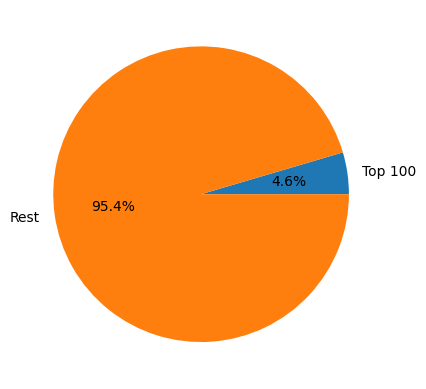

In [77]:
ax, fig = plt.subplots()

plt.pie([top_n_sum, rest_sum], labels = ['Top 100', 'Rest'], autopct = '%1.1f%%')

plt.show()

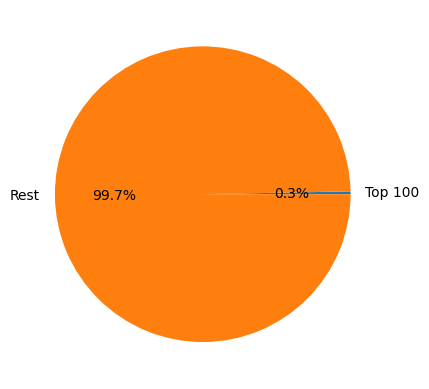

In [78]:
ax, fig = plt.subplots()

plt.pie([n, 32789], labels = ['Top 100', 'Rest'], autopct = '%1.1f%%')

plt.show()

In [70]:
# Group by 'product_id' and keep the top 10 values by 'dimensions'
df = df.sort_values(by=['product_id', 'product_volume_cubic_cm'], ascending=[True, False])

# Get the top 10 rows per group
top_10 = df.groupby('product_id').head(10).reset_index(drop=True)

print(top_10)

                               order_id                       customer_id  \
0      f30149f4a8882a08895b6a242aa0d612  86c180c33f454b35e1596a99da3dddc4   
1      f5eda0ded77c1293b04c953138c8331d  68f2b37558e27791155db34bcded5ac0   
2      0bf736fd0fd5169d60de3699fcbcf986  6cd217b674e22cf568f6a2cf6060fd07   
3      6f0dfb5b5398b271cc6bbd9ee263530e  8517e7c86998bf39a540087da6f115d9   
4      3aba44d8e554ab4bb8c09f6f78032ca8  82b838f513e00463174cc7cae7e76c1f   
...                                 ...                               ...   
84394  beaf95465b542dea76df78b2fb86a97a  d14930bf3da4e0ba5a02cc8d6ac80f6e   
84395  dd38c566a34ff9deb93ff05d7bd6d0aa  35e8f2cff4eeed925cfa42f6731a4425   
84396  2878b4e373a9556df9aa1708a4e5c3c8  a050cd2edce49d430222e6019fa50fd2   
84397  a8159270bc9cf7d54450e079ba6b7232  839b3007f7e5aee8f8eb130c8fa51c29   
84398  fbf3da6fe82010412982890b0c57e532  e24fae1db3d4f392215beb9553f72f82   

      order_status order_purchase_timestamp    order_approved_at  \
0      

In [71]:
top_10

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_volume_cubic_cm
0,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:21,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:56,2018-06-20 00:00:00,1,00066f42aeeb9f3007548bb9d3f33c38,...,credit_card,3,120.24,91845d1f2ee1fdb677c769fad86f2109,5,NaN,NaN,2018-06-07 00:00:00,2018-06-08 10:59:20,5120.0
1,f5eda0ded77c1293b04c953138c8331d,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:28,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:51,2018-01-05 00:00:00,1,00088930e925c41fd95ebfe695fd2655,...,credit_card,1,143.83,e5636189f943b2589b37f715a3bcae96,4,NaN,NaN,2017-12-24 00:00:00,2017-12-27 13:23:27,14300.0
2,0bf736fd0fd5169d60de3699fcbcf986,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:47,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:41,2018-01-16 00:00:00,1,0009406fd7479715e4bef61dd91f2462,...,credit_card,10,242.10,32247878e34bd6e8d7dbf7b31a4ae0b0,1,NaN,Meu produto não foi entregue até o momento!,2018-01-07 00:00:00,2018-01-11 11:03:53,23625.0
3,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:52,2018-08-24 00:00:00,1,000b8f95fcb9e0096488278317764d19,...,credit_card,1,78.50,14303ce09673466b69c4354628aa5a84,5,Produto bom,"Produto bom, mas o pegador da tampa é de plást...",2018-08-08 00:00:00,2018-08-08 23:48:48,5472.0
4,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:40,2018-08-27 00:00:00,1,000b8f95fcb9e0096488278317764d19,...,credit_card,4,78.50,40f2e7bbfda859ba75411743546849b0,5,NaN,"Produto igual ao anunciado, de excelente quali...",2018-08-18 00:00:00,2018-08-22 12:40:29,5472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84394,beaf95465b542dea76df78b2fb86a97a,d14930bf3da4e0ba5a02cc8d6ac80f6e,delivered,2018-04-19 10:12:12,2018-04-19 10:34:35,2018-04-19 19:26:57,2018-04-25 17:58:54,2018-05-15 00:00:00,1,fffdb2d0ec8d6a61f0a0a0db3f25b441,...,credit_card,1,53.22,0d08c2a8bfac89835f50b9f0985bf458,5,NaN,NaN,2018-04-26 00:00:00,2018-04-26 22:23:43,832.0
84395,dd38c566a34ff9deb93ff05d7bd6d0aa,35e8f2cff4eeed925cfa42f6731a4425,delivered,2018-05-01 17:31:41,2018-05-01 17:53:01,2018-05-02 15:04:00,2018-05-03 18:32:48,2018-05-15 00:00:00,1,fffdb2d0ec8d6a61f0a0a0db3f25b441,...,credit_card,3,42.38,54789b1074bd86fd085fa80c40652e4d,5,NaN,NaN,2018-05-04 00:00:00,2018-05-05 16:54:37,832.0
84396,2878b4e373a9556df9aa1708a4e5c3c8,a050cd2edce49d430222e6019fa50fd2,delivered,2018-08-07 16:07:57,2018-08-07 16:55:38,2018-08-09 07:06:00,2018-08-09 18:54:34,2018-08-10 00:00:00,1,fffdb2d0ec8d6a61f0a0a0db3f25b441,...,debit_card,1,42.50,4151a956fa46db45a4a37f7ec48f359d,5,NaN,NaN,2018-08-10 00:00:00,2018-08-11 01:16:57,832.0
84397,a8159270bc9cf7d54450e079ba6b7232,839b3007f7e5aee8f8eb130c8fa51c29,delivered,2018-04-01 11:58:04,2018-04-03 05:35:27,2018-04-03 19:47:10,2018-04-20 20:56:36,2018-04-20 00:00:00,1,fffdb2d0ec8d6a61f0a0a0db3f25b441,...,boleto,1,48.22,325c817bbd36f7aee81165cc7913a7c6,5,NaN,Uma excelente ferramenta.,2018-04-21 00:00:00,2018-04-24 23:33:13,832.0
